# Problem Statement: Predicting survival from diabetes

# Description:

## *Diabetes is a chronic (long-lasting) and are most common disease health condition that affects how your body turns food into energy.

# 1. Importing Libraries

In [82]:
import os
from sklearn.impute import SimpleImputer
import seaborn as sns
from scipy.special import expit
import numpy as np
import pandas as pd

# Visulization
from matplotlib import pyplot
from sklearn.metrics import roc_curve, roc_auc_score
# data modeling
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# pipeline setup
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

# metrics
from sklearn.metrics import mean_squared_error
from sklearn import metrics

# model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
import warnings

# 2.Dataset Information

### The `pd.read_csv()` function is a convenient method in Pandas that allows you to read data from a CSV file and create a DataFrame.

In [2]:
data1=pd.read_csv("diabetes.csv")
data1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Datasets:
* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: Diabetes pedigree function
* Age: Age (years)
* Outcome: Class variable (0 or 1)

# 3. Handling Null Value 

In [3]:
data1.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


### * Let’s have a look at whether the columns of this dataset contains any null values or not:

In [4]:
data1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

####  In this case, all columns have 0 missing values, meaning that the DataFrame does not contain any NaN or null values in any of its columns. This is good news as it simplifies the data analysis process since you don't need to handle missing data before proceeding with your analysis or modeling tasks.

# 4. Data Exploration

In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
dataset_1 = data1.astype(float)
dataset_1.dtypes

Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                     float64
dtype: object

In [9]:
data1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
data1.shape

(768, 9)

In [22]:
data1.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [11]:
corr_matrix=data1.corr()
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


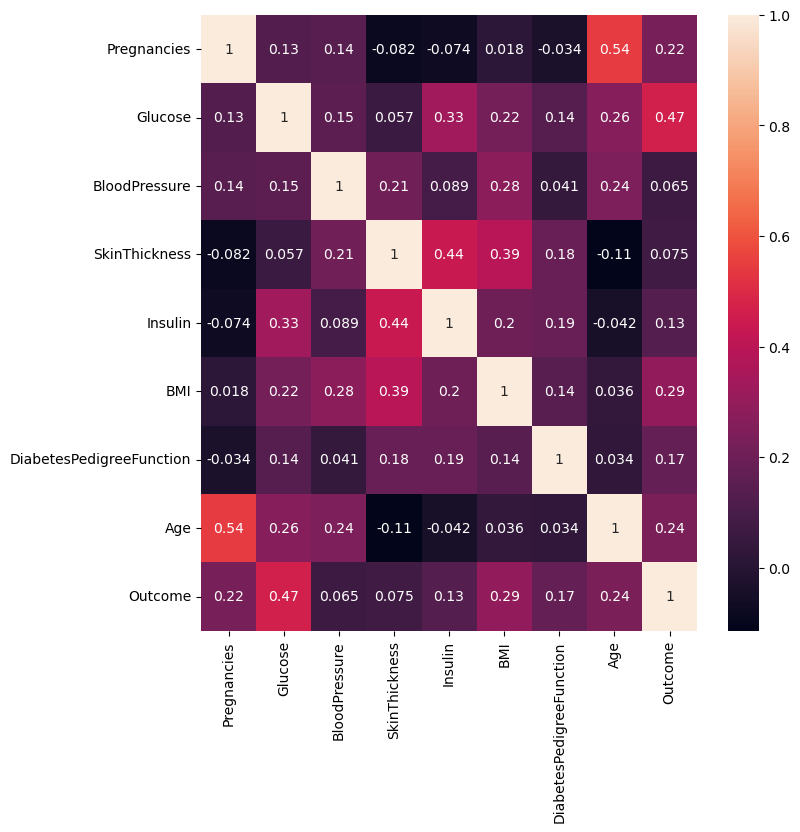

In [12]:
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, annot = True)

# display the plot
plt.show()

In [6]:
import numpy as np
import pandas as pd

# Visulization
from matplotlib import pyplot

# data modeling
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# pipeline setup
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

# metrics
from sklearn.metrics import mean_squared_error

# model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

# # Problem framing

In [7]:
# define dependant and independant columns
input_col = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI","DiabetesPedigreeFunction","Age"]
target_col = ["Outcome"]

In [8]:
#diabetes = data1.sample(frac=1).reset_index(drop=True)

In [9]:
#diabetes 

# Prepare data for ML model

In [10]:
# split train/test data
data1 = data1.sample(frac=1).reset_index(drop=True)
X_train = data1.iloc[:178][input_col]
y_train = data1.iloc[:178][target_col]
X_test = data1.iloc[178:][input_col]
y_test = data1.iloc[178:][target_col]

# Training linear regression model (OLS)

In [11]:
assert (X_train.shape[0] + X_test.shape[0]) == data1.shape[0]

In [12]:
LR_model = LinearRegression()

In [13]:
LR_model.fit(X_train, y_train)

LinearRegression()

### # Interprete the model  and coef:

In [14]:
LR_model.coef_, LR_model.intercept_

(array([[ 0.04494133,  0.00497158, -0.0016678 ,  0.00019958, -0.00030605,
          0.01246398,  0.12329559,  0.00132589]]),
 array([-0.82529224]))

# MSE (train data, test data):

In [15]:
LR_model.score(X_train, y_train)

0.2694350197262887

In [16]:
mean_squared_error(LR_model.predict(X_train), y_train) # MSE of train data

0.15107504578820086

In [17]:
y_hat = LR_model.predict(X_test)

In [18]:
mean_squared_error(y_hat, y_test) # MSE of test data

0.17155672086601623

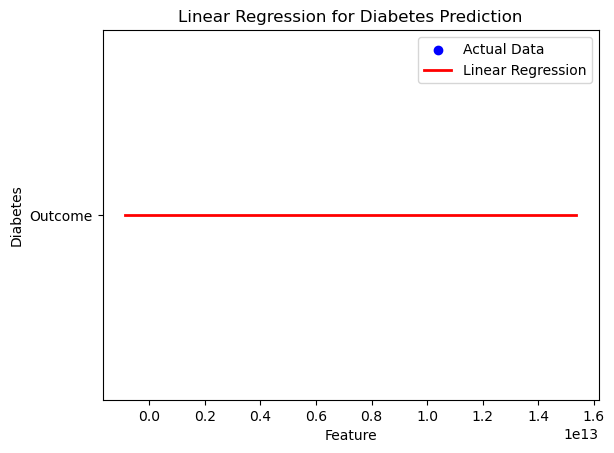

In [64]:
# Plot the regression line along with the actual data points
  
plt.scatter(y_test, y_hat, color='blue', label='Actual Data')
plt.plot(,[min(y_test), max(y_test)], color='red', linewidth=2, label='Linear Regression')
plt.xlabel('Feature')
plt.ylabel('Diabetes')
plt.legend()
plt.title('Linear Regression for Diabetes Prediction')
plt.show()

# Use Gradient based learning:

In [19]:
SGD_model = SGDRegressor(max_iter=1000000 , eta0=0.001)


In [20]:
SGD_model.fit(X_train, y_train)

C:\Users\Alalwai\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(eta0=0.001, max_iter=1000000)

In [21]:
SGD_model.fit(X_train, y_train.squeeze())

SGDRegressor(eta0=0.001, max_iter=1000000)

 ### Interprete the model and coef:

In [22]:
  SGD_model.coef_, SGD_model.intercept_ 

(array([ 4.96348688e+09,  5.24911548e+09, -4.99074141e+09, -6.43637649e+09,
         1.82174363e+10,  1.85988272e+09, -2.64476586e+09, -1.11288256e+10]),
 array([-3.32574556e+09]))

# MSE (train data, test data):


In [23]:
 mean_squared_error(SGD_model.predict(X_train), y_train) # MSE train data

5.43110339401214e+24

In [24]:
y_hat = SGD_model.predict(X_test)

In [25]:
mean_squared_error(y_hat, y_test) # MSE test data

6.460639850485921e+24

In [26]:
train_set, test_set = train_test_split(data1, test_size=0.2)

In [27]:
train_set.shape, test_set.shape

((614, 9), (154, 9))

# LogisticRegression:

In [28]:
clf = LogisticRegression(C=1e5)
clf.fit(X_train, y_train)

C:\Users\Alalwai\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alalwai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=100000.0)

In [74]:
y_prob = clf.predict_proba(X_test)[:, 1]

In [75]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

In [76]:
# Calculate the AUC-ROC score
auc = roc_auc_score(y_test, y_prob)

In [77]:
auc

0.804726183402654

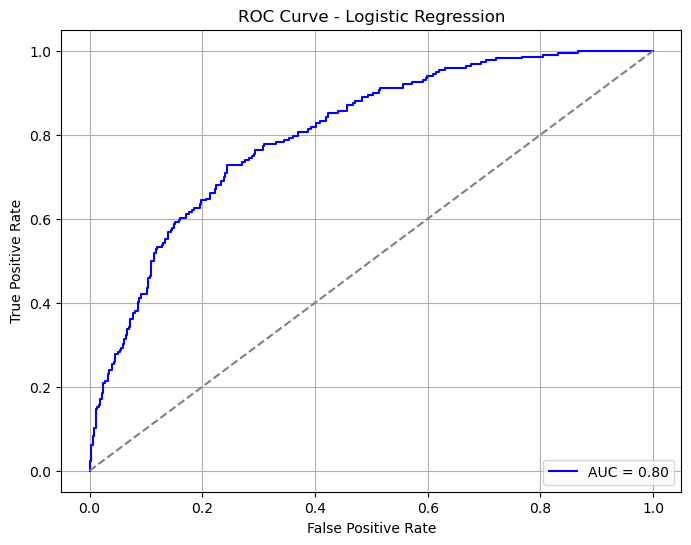

In [78]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Model Prediction:

In [87]:
x = np.array(data1[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI","DiabetesPedigreeFunction","Age"]])
y = np.array(data1[['Outcome']])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)

In [90]:
model=SVC()
model.fit(x_train,y_train)

C:\Users\Alalwai\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [92]:
# features = [["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI","DiabetesPedigreeFunction","Age"']]
features = np.array([[6, 148, 72, 35, 0., 33.6, 0.627, 50]])
print(model.predict(features))


[1]


In [93]:
# features = [["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI","DiabetesPedigreeFunction","Age"']]
features = np.array([[9, 119, 80, 35, 0, 29, 0.263, 29]])
print(model.predict(features))



[0]


In [94]:
y_pred=model.predict(x_test)

y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

# Model Accuracy:

In [95]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[44,  7],
       [12, 14]], dtype=int64)

In [96]:
true_positive = conf_mat[0][0] #TP
false_positive = conf_mat[0][1]#FP
false_negative = conf_mat[1][0]#FN
true_negative = conf_mat[1][1]#TN

In [97]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive +false_negative + true_negative)
Accuracy

0.7532467532467533

In [98]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.8627450980392157

In [99]:
 Recall = true_positive/(true_positive+false_negative)
Recall

0.7857142857142857

In [100]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8224299065420562